# Image compression using SVD

This example is taken from Brunton and Katz and modified a little bit.

In [1]:
%config InlineBackend.figure_format = 'svg'
import matplotlib.pyplot as plt
from matplotlib.image import imread
import numpy as np
import os

If the image file does not exist, then download it.

In [2]:
if os.path.isfile('../DATA/dog.jpg') == False:
    !mkdir -p ../DATA
    !wget -P ../DATA -c https://bitbucket.org/cpraveen/nla/downloads/dog.jpg

Read and plot the image.

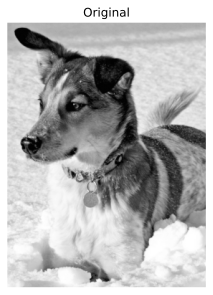

In [3]:
A = imread('../DATA/dog.jpg')
X = np.mean(A, -1); # Convert RGB to grayscale

img = plt.imshow(X)
img.set_cmap('gray')
plt.axis('off')
plt.title('Original')
plt.show()

Compute the reduced SVD

In [7]:
U, S, VT = np.linalg.svd(X,full_matrices=False)
m, n = X.shape
print("Original image = m x n = %d x %d" %  (m, n))

Original image = m x n = 2000 x 1500


Plot the singular values $\sigma_j$ and their cumulative sums

$$
\sum_{k=0}^{j-1} \sigma_k
$$

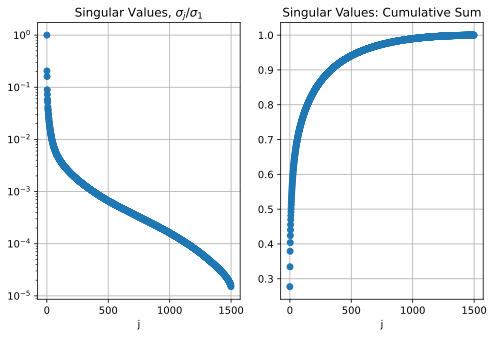

In [5]:
plt.figure(figsize=(8,5))

plt.subplot(1,2,1)
plt.semilogy(S/S[0],'o')
plt.title('Singular Values, $\\sigma_j/\\sigma_1$')
plt.xlabel('j')
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(np.cumsum(S)/np.sum(S),'o')
plt.title('Singular Values: Cumulative Sum')
plt.xlabel('j')
plt.grid(True)

plt.show()

The singular values decrease very rapidly, only the first few are significant compared to the largest one. 

## Low rank approximations

For given integer $r$, form

$$
X_r = U_r \Sigma_r V_r^\top
$$

$$
U_r = \begin{bmatrix}
| &   &  | \\
u_1 & \ldots & u_r \\
| &   &  | \\
\end{bmatrix}, \qquad
\Sigma_r = \textrm{diag}[\sigma_1, \ldots, \sigma_r], \qquad
V_r = \begin{bmatrix}
| &   &  | \\
v_1 & \ldots & v_r \\
| &   &  | \\
\end{bmatrix}
$$

$X_r$ requires us to store $r(1 + m + n)$ numbers, while full image requires $m n$ numbers.

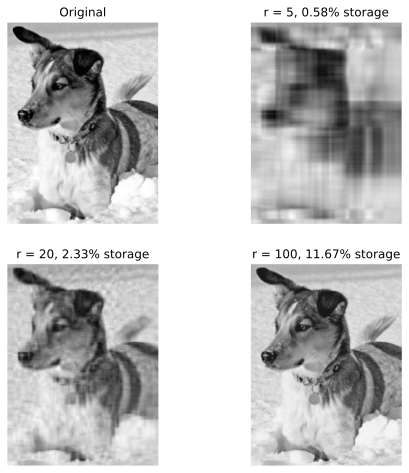

In [6]:
plt.figure(figsize=(8,8))

# Plot original image
j = 0
plt.subplot(2,2,j+1); j += 1
img = plt.imshow(X)
img.set_cmap('gray')
plt.axis('off')
plt.title('Original')

for r in (5, 20, 100):
    # Construct approximate image
    Xapprox = U[:,:r] @ np.diag(S[0:r]) @ VT[:r,:]
    plt.subplot(2,2,j+1); j += 1
    img = plt.imshow(Xapprox)
    img.set_cmap('gray')
    plt.axis('off')
    s = round((r*(1 + m + n))/(m*n) * 100, 2)
    plt.title('r = ' + str(r)+', '+str(s)+'% storage')
plt.show()

The rank 100 approximation gives an image almost indistinguishable from the original and requires only about 12% of storage.